In [1]:
import pandas as pd
from statistics import mean 

In [2]:
individual = pd.read_csv('./data/processed_individual_cases_Sep20th2020.csv', parse_dates=True)
loc = pd.read_csv('./data/processed_location_Sep20th2020.csv', parse_dates=True)

# 1.1 Exploratory Data Analysis 

In [3]:
list(individual.columns)

['age',
 'sex',
 'province',
 'country',
 'latitude',
 'longitude',
 'date_confirmation',
 'additional_information',
 'source',
 'outcome']

In [4]:
import matplotlib.pyplot as plt
tmp = individual[individual['longitude'].notna()]
#plt.scatter(tmp['longitude'], tmp['latitude'], 'b.')
plt.plot(tmp['longitude'], tmp['latitude'],'b.',alpha=1e-2)
#plt.savefig('longlat.jpg')

In [5]:
list(loc.columns)

['Province_State',
 'Country_Region',
 'Last_Update',
 'Lat',
 'Long_',
 'Confirmed',
 'Deaths',
 'Recovered',
 'Active',
 'Combined_Key',
 'Incidence_Rate',
 'Case-Fatality_Ratio']

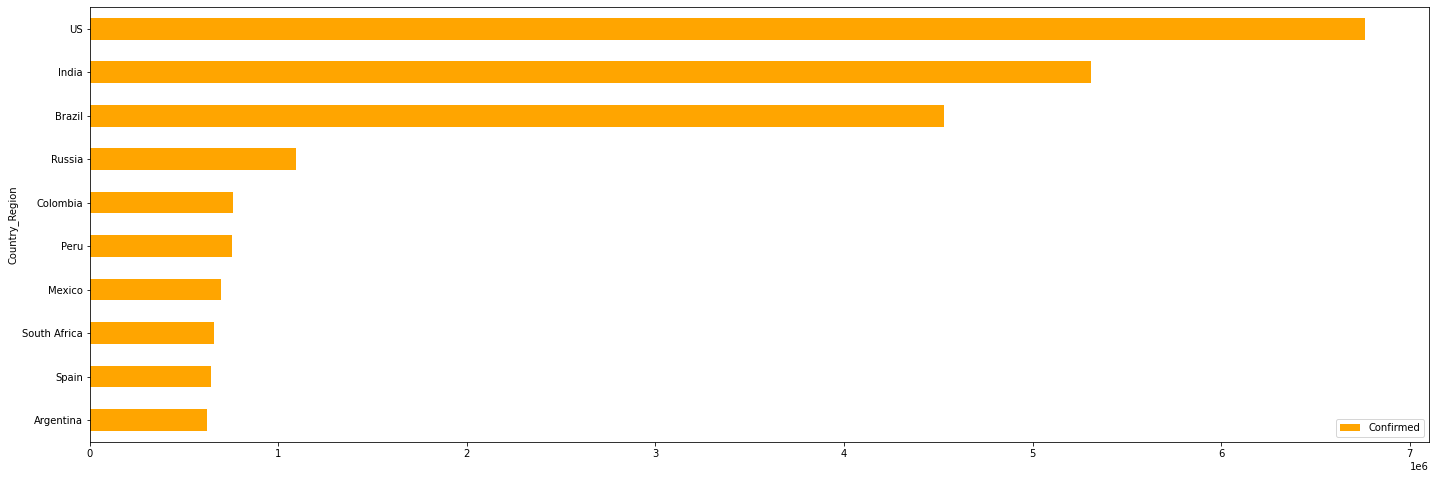

In [6]:
country_total = loc.groupby(by='Country_Region').sum()

confirmed_total = country_total.sort_values(by='Confirmed', ascending=False).head(10).reset_index()
confirmed_total.plot.barh(x='Country_Region', y='Confirmed', color='orange',figsize=(24,8)).invert_yaxis()

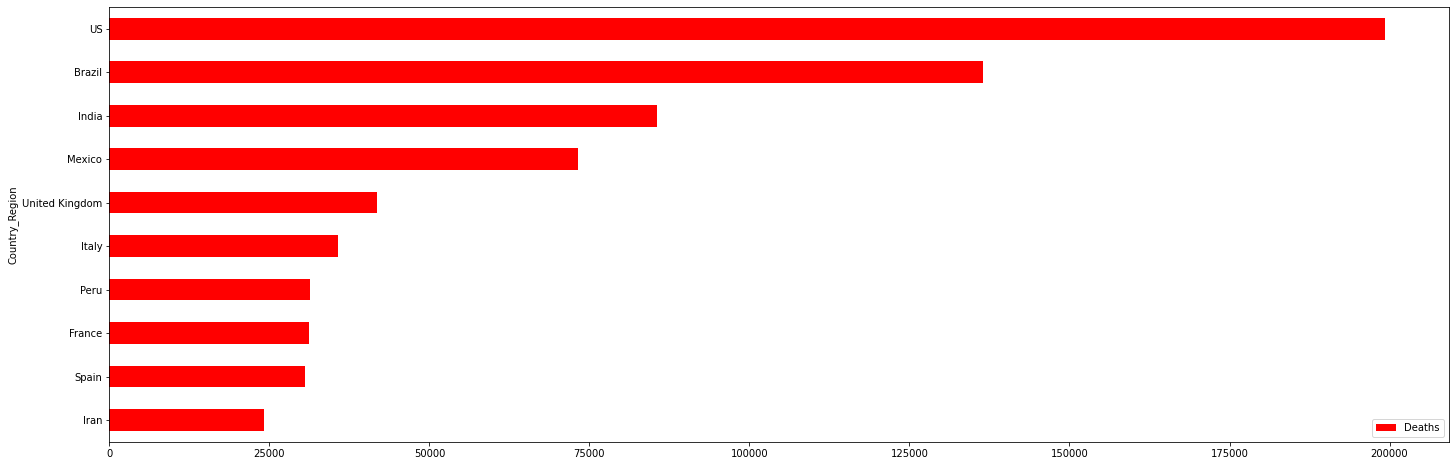

In [7]:
death_total = country_total.sort_values(by='Deaths', ascending=False).head(10).reset_index()
death_total.plot.barh(x='Country_Region', y='Deaths', color='red',figsize=(24,8)).invert_yaxis()

In [8]:
# US data has no recoveries
#recovered_total = country_total.sort_values(by='Recovered', ascending=False).head(10).reset_index()
#recovered_total.plot.barh(x='Country_Region', y='Recovered', color='green').invert_yaxis()

<AxesSubplot:xlabel='Country_Region'>

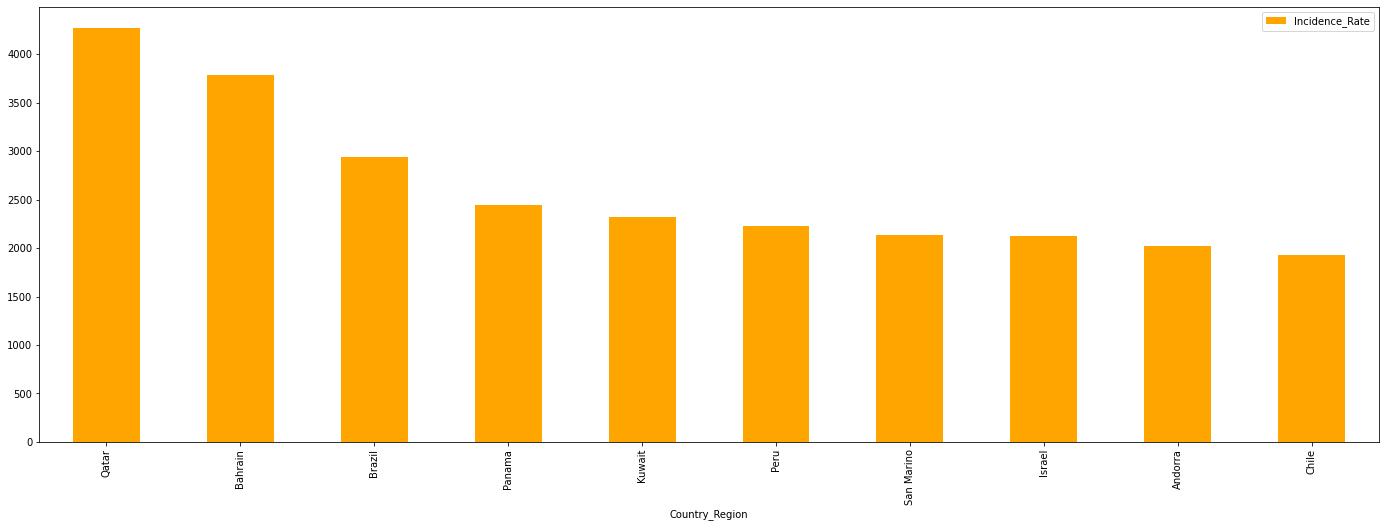

In [9]:
country_mean = loc.groupby(by='Country_Region').mean()

incidence_rate = country_mean.sort_values(by='Incidence_Rate', ascending=False).head(10).reset_index()
incidence_rate.plot.bar(x='Country_Region', y='Incidence_Rate', color='orange',figsize=(24,8))

<AxesSubplot:xlabel='Country_Region'>

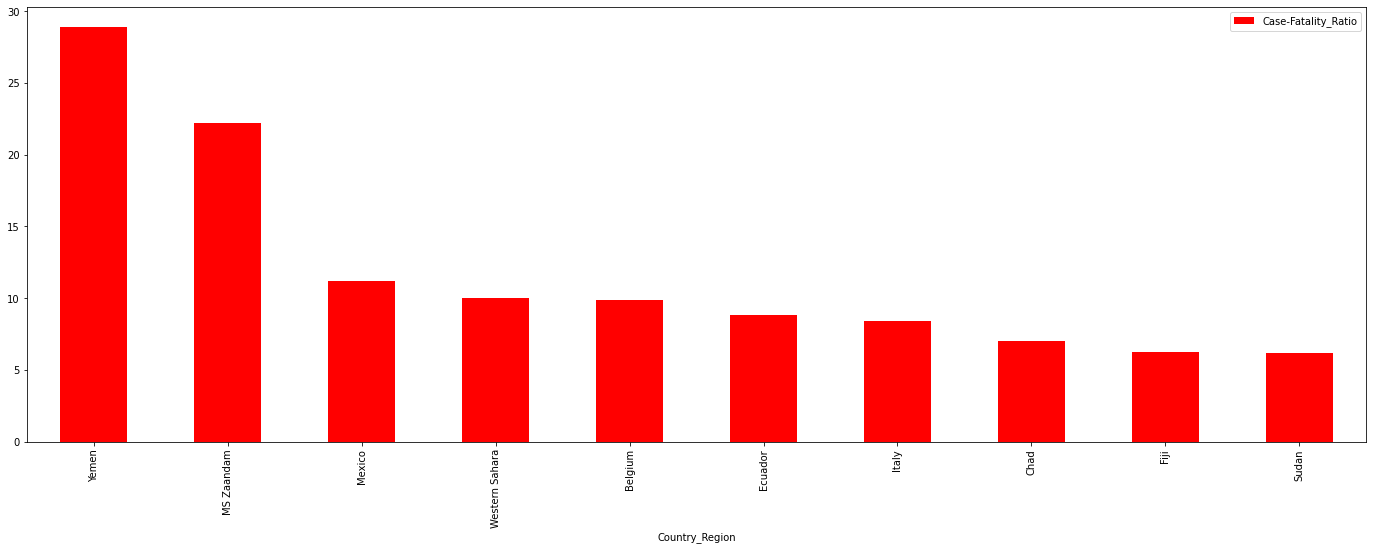

In [10]:
fatality_ratio = country_mean.sort_values(by='Case-Fatality_Ratio', ascending=False).head(10).reset_index()
fatality_ratio.plot.bar(x='Country_Region', y='Case-Fatality_Ratio', color='red',figsize=(24,8))

## Values missing for the individual cases

In [11]:
for col in individual.columns:
    print(f'Column {col} has {individual[col].isna().sum()} missing values')

Column age has 296874 missing values
Column sex has 293734 missing values
Column province has 6568 missing values
Column country has 24 missing values
Column latitude has 2 missing values
Column longitude has 2 missing values
Column date_confirmation has 462 missing values
Column additional_information has 522969 missing values
Column source has 209191 missing values
Column outcome has 0 missing values


## Values missing from the location cases

In [12]:
for col in loc.columns:
    print(f'Column {col} has {loc[col].isna().sum()} values')

Column Province_State has 168 values
Column Country_Region has 0 values
Column Last_Update has 0 values
Column Lat has 80 values
Column Long_ has 80 values
Column Confirmed has 0 values
Column Deaths has 0 values
Column Recovered has 0 values
Column Active has 2 values
Column Combined_Key has 0 values
Column Incidence_Rate has 80 values
Column Case-Fatality_Ratio has 48 values


## 1.2 Converting the age to a reasonable value
For range ages we used the mean of the upper and lower bound to represent the age of the patient and for ages that we had an age and above, we use the base age for representing the patients age

In [13]:
def try_convert(x):
    try:
        pd.to_numeric(x)
    except:
        if '-' in x:
            try:
                return mean([int(i) for i in x.split('-')])
            except:
                return int(x.split('-')[0])
        elif '+' in x:
            return int(x.split('+')[0])
        else:
            return int(x.split()[0])/12.

In [14]:
individual['age'] = individual['age'].apply(try_convert,)

### Patients Ages

<AxesSubplot:ylabel='Frequency'>

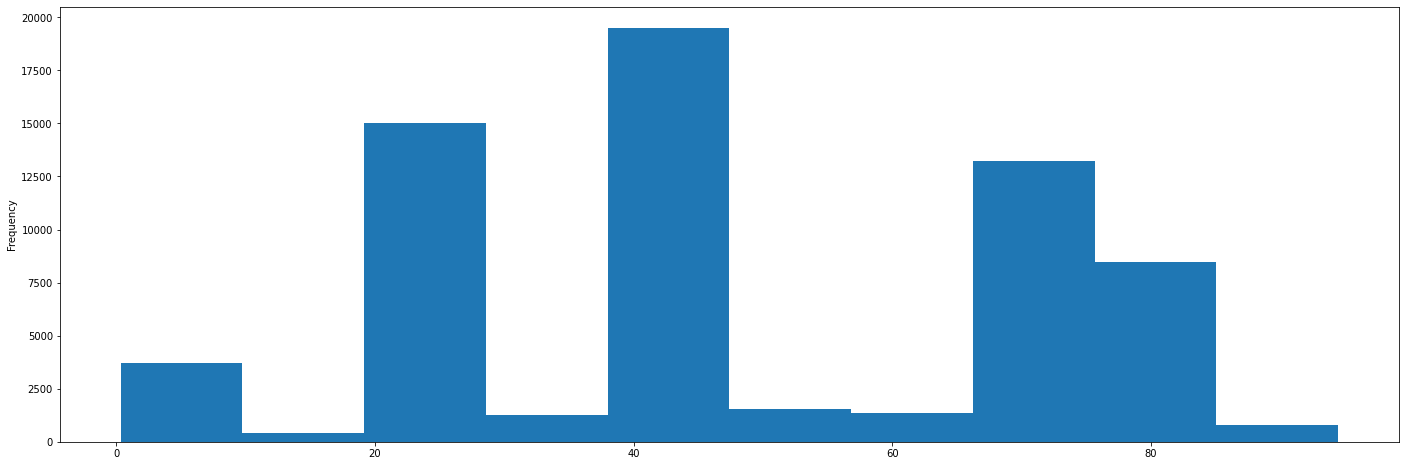

In [15]:
individual[individual['age'].notna()]['age'].plot(kind='hist',figsize=(24,8))

## Date conversion 

In [16]:
# Range dates
d_1 = pd.to_datetime(individual[(individual['date_confirmation'].str.contains('-')) & (individual['date_confirmation'].notna())]['date_confirmation'].str.split('-', expand=True)[0])
d_2 = pd.to_datetime(individual[(individual['date_confirmation'].str.contains('-')) & (individual['date_confirmation'].notna())]['date_confirmation'].str.split('-', expand=True)[1])
# Dates that the conversion is inconsistant with the actual date
d_1[d_2.dt.month - d_1.dt.month<0]

18747    2020-10-03
42927    2020-10-03
100214   2020-10-03
116279   2020-12-03
170613   2020-10-03
171967   2020-10-03
195883   2020-12-03
206155   2020-10-03
210762   2020-12-03
221985   2020-10-03
241475   2020-10-03
257565   2020-10-03
262669   2020-07-03
269995   2020-12-03
279467   2020-10-03
303270   2020-10-03
313904   2020-10-03
353920   2020-12-03
358513   2020-10-03
371061   2020-10-03
376960   2020-12-03
391248   2020-10-03
398512   2020-10-03
408347   2020-10-03
429885   2020-06-03
453014   2020-10-03
461654   2020-10-03
471331   2020-12-03
490766   2020-10-03
494172   2020-12-03
498182   2020-10-03
518141   2020-10-03
Name: 0, dtype: datetime64[ns]

In [17]:
individual['date_confirmation'] = pd.to_datetime(individual[~individual['date_confirmation'].str.contains('-',na=False)]['date_confirmation'])
individual

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,outcome
0,NaN,NaN,Gujarat,India,23.02776,72.60027,2020-04-15,NaN,https://gujcovid19.gujarat.gov.in/uploads/pres...,hospitalized
1,NaN,male,Moyobamba,Peru,-6.03271,-76.97230,2020-09-05,NaN,NaN,nonhospitalized
2,NaN,female,Lima,Peru,-12.04318,-77.02824,2020-04-15,NaN,NaN,nonhospitalized
3,NaN,NaN,Gujarat,India,23.02776,72.60027,2020-05-22,NaN,https://www.deshgujarat.com/2020/05/22/gujarat...,hospitalized
4,NaN,female,Coronel Portillo,Peru,-8.40921,-74.55572,2020-04-30,NaN,NaN,nonhospitalized
...,...,...,...,...,...,...,...,...,...,...
557359,NaN,male,Callao,Peru,-12.04175,-77.09082,2020-04-15,NaN,NaN,nonhospitalized
557360,NaN,NaN,Maharashtra,India,18.94017,72.83483,2020-05-29,NaN,https://arogya.maharashtra.gov.in/pdf/ncovidep...,recovered
557361,NaN,NaN,Maharashtra,India,19.03681,73.01582,2020-05-19,NaN,NaN,recovered
557362,NaN,female,Tamil Nadu,India,13.08362,80.28252,2020-05-31,NaN,https://stopcorona.tn.gov.in/wp-content/upload...,hospitalized


## BAD DATE CONVERSION, DAYS AND MONTHS ARE SWAPPED

In [18]:
individual[individual['date_confirmation']>pd.to_datetime('2020-09-20')]

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,outcome
9,NaN,NaN,West Bengal,India,23.797760,87.986406,2020-11-04,"As per MohFW update,",https://www.mohfw.gov.in/,hospitalized
24,NaN,NaN,Punjab,India,29.990840,75.399970,2020-11-05,NaN,http://pbhealth.gov.in/Media%20Bulletin%20COVI...,hospitalized
31,NaN,NaN,Maharashtra,India,18.940170,72.834830,2020-10-05,NaN,https://arogya.maharashtra.gov.in/pdf/ncovidep...,recovered
54,NaN,NaN,Gujarat,India,22.309460,73.179930,2020-12-05,NaN,https://twitter.com/PIBAhmedabad/status/126021...,recovered
75,NaN,NaN,el oro,Ecuador,-3.258111,-79.955392,2020-11-04,NaN,NaN,nonhospitalized
...,...,...,...,...,...,...,...,...,...,...
557317,NaN,NaN,Maharashtra,India,18.940170,72.834830,2020-10-05,NaN,https://t.me/indiacovid/4483,hospitalized
557323,NaN,female,Tamil Nadu,India,13.083620,80.282520,2020-12-05,NaN,https://stopcorona.tn.gov.in/wp-content/upload...,hospitalized
557327,NaN,NaN,West Bengal,India,24.176090,88.272960,2020-11-05,NaN,https://www.wbhealth.gov.in/uploaded_files/cor...,hospitalized
557344,NaN,NaN,Maharashtra,India,18.940170,72.834830,2020-10-05,NaN,https://t.me/indiacovid/4483,hospitalized


In [19]:
daily_sum = individual['date_confirmation'].value_counts()

<AxesSubplot:>

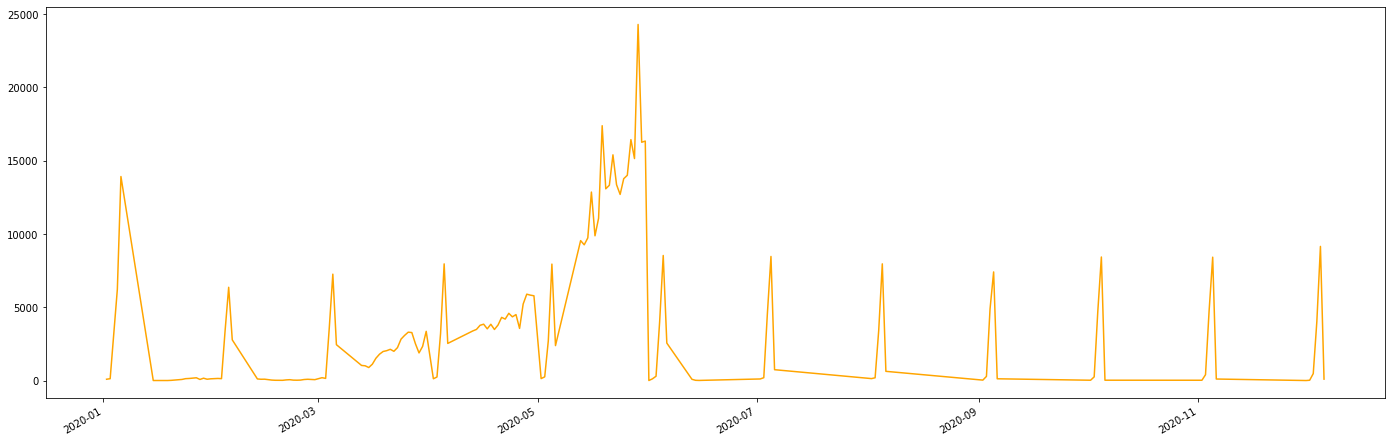

In [20]:
# Number of cases per day
daily_sum.plot.line(figsize=(24,8), color='orange')

# 1.3 Remove outliers

In [21]:
# Remove values without longitude and latitude. These values are cruiseships and unknown counties
loc = loc.dropna(subset=['Lat', 'Long_'])

# Remove values with out-of-bounds long/lat ranges
loc = loc.drop(loc[(loc.Lat < -90) | (loc.Lat > 90) | (loc.Long_ < -180) | (loc.Long_ > 180)].index)

# Drop empty cases with no country or location data
individual = individual.dropna(subset=['country', 'latitude', 'longitude'])

# Remove values with out-of-bounds long/lat ranges
individual = individual.drop(individual[(individual.latitude < -90) | (individual.latitude > 90) | (individual.longitude < -180) | (individual.longitude > 180)].index)

# 1.4 Aggregate states 

## US cases

<AxesSubplot:title={'center':'Confirmed cases across US'}, xlabel='States', ylabel='Log of # of cases'>

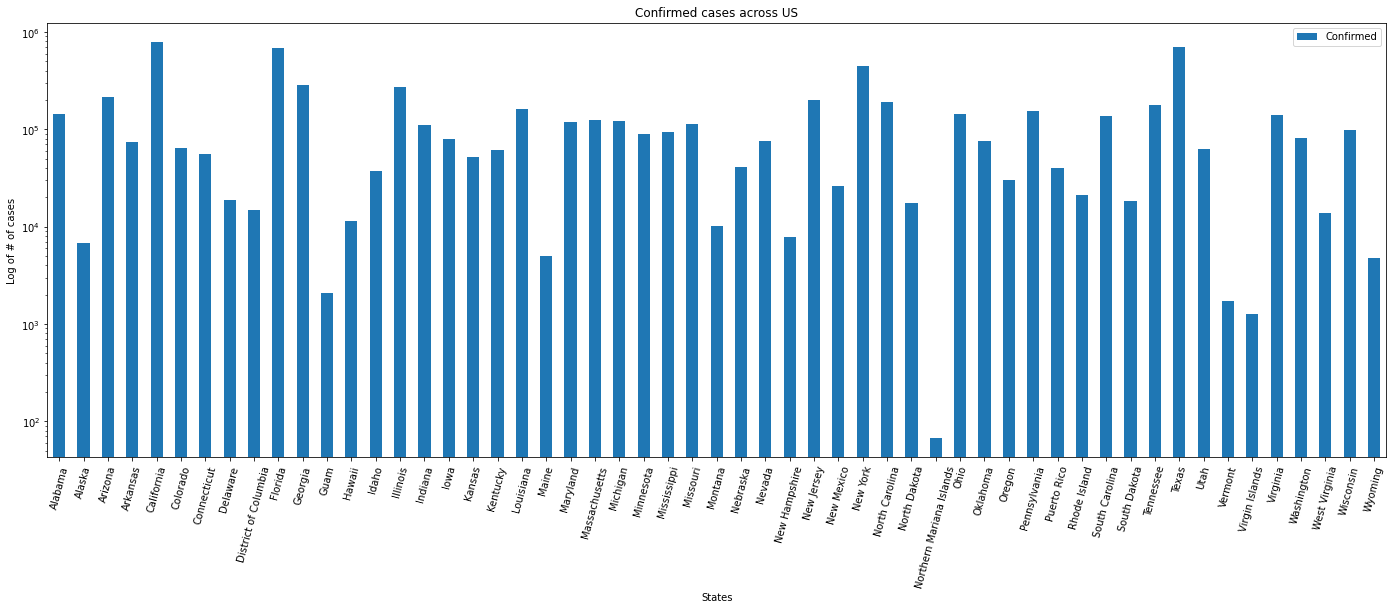

In [22]:
us_cases = loc[loc['Country_Region'] == 'US'].groupby(['Province_State']).agg({'Confirmed':'sum'}).reset_index()
us_cases[['Province_State', 'Confirmed']].plot(x='Province_State',kind='bar',figsize=(24,8),logy=True,xlabel='States', ylabel='Log of # of cases', title='Confirmed cases across US', rot=75)

C:\Users\Leo\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
No handles with labels found to put in legend.


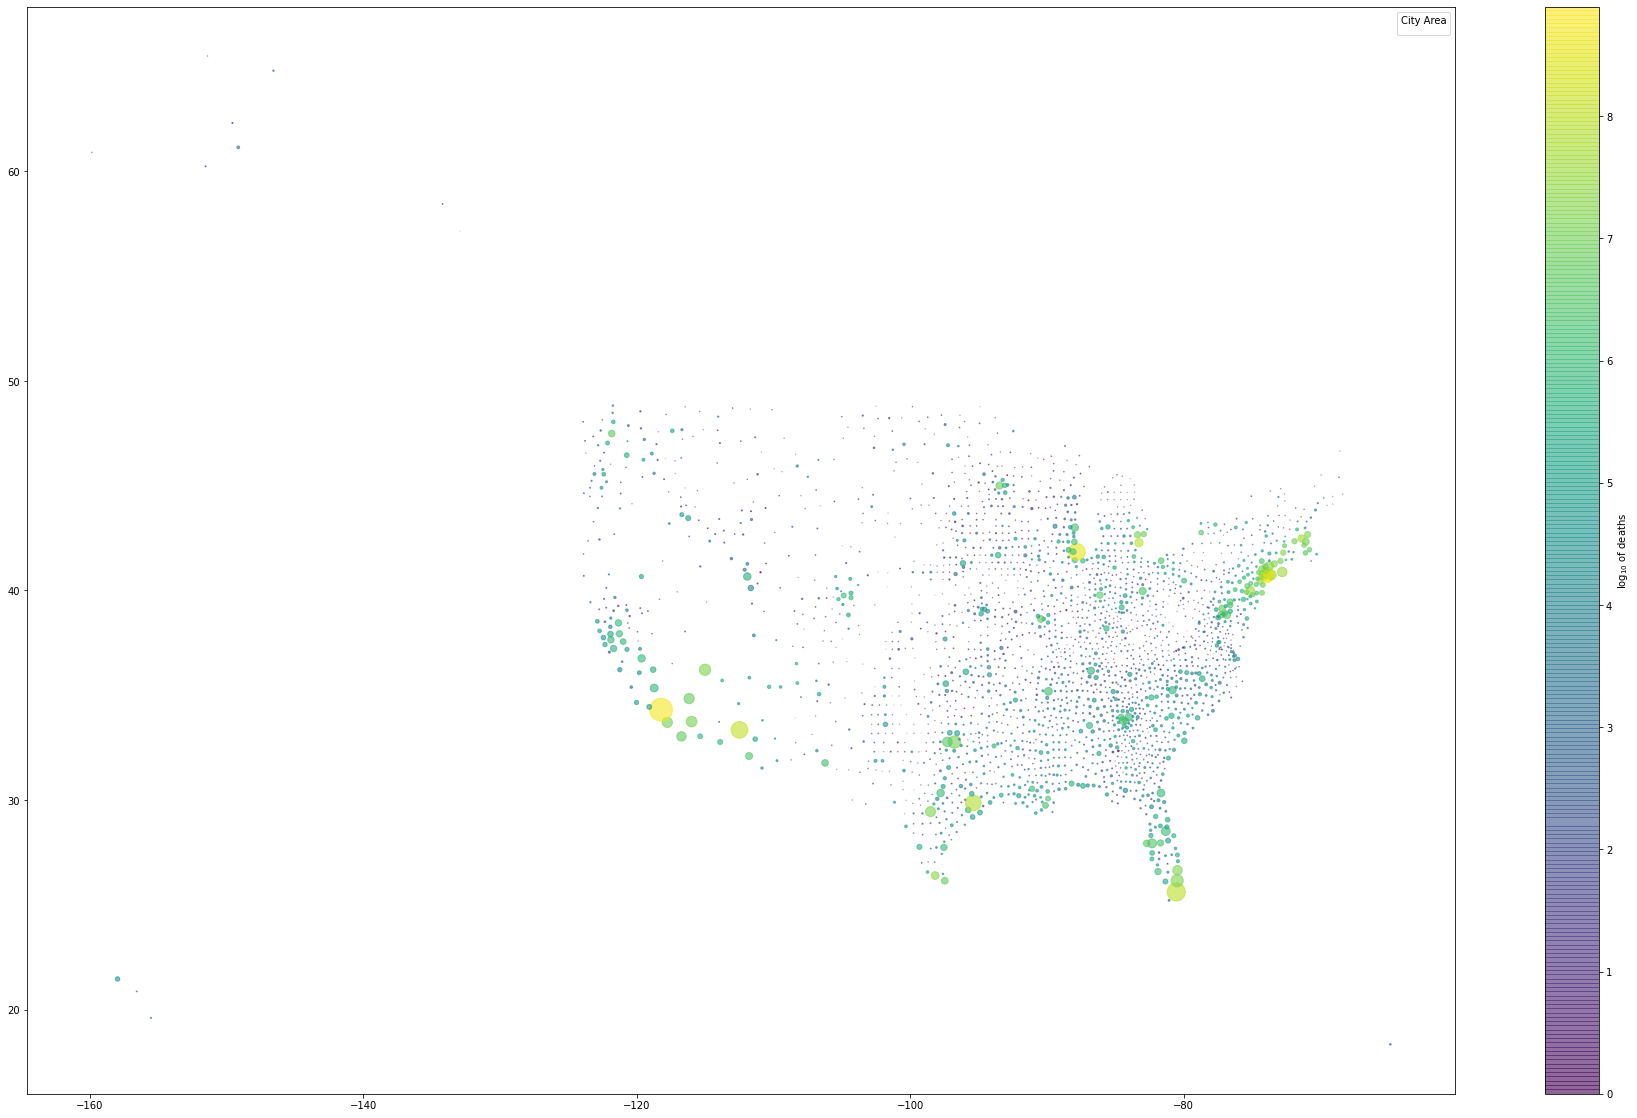

In [23]:
import numpy as np
plt.figure(figsize=(32,20))
regional_cases = loc[(loc['Country_Region'] == 'US') & (loc['Long_'] < 100)].groupby(['Lat', 'Long_','Province_State']).agg({'Confirmed':'sum', 'Deaths':'sum', 'Active':'sum'}).reset_index()
plt.scatter(regional_cases['Long_'], regional_cases['Lat'], s=regional_cases['Confirmed']/5e2, c=np.log(regional_cases['Deaths']), alpha=6e-1)
plt.legend(title='City Area')
plt.colorbar(label='log$_{10}$ of deaths')
plt.savefig('Cases.jpg')

In [24]:
us_loc = loc[loc['Country_Region'] == 'US']
us_loc.head

<bound method NDFrame.head of      Province_State Country_Region          Last_Update        Lat  \
631         Alabama             US  2020-09-20 04:22:56  32.539527   
632         Alabama             US  2020-09-20 04:22:56  30.727750   
633         Alabama             US  2020-09-20 04:22:56  31.868263   
634         Alabama             US  2020-09-20 04:22:56  32.996421   
635         Alabama             US  2020-09-20 04:22:56  33.982109   
...             ...            ...                  ...        ...   
3895        Wyoming             US  2020-09-20 04:22:56  41.659439   
3896        Wyoming             US  2020-09-20 04:22:56  43.935225   
3897        Wyoming             US  2020-09-20 04:22:56  41.287818   
3899        Wyoming             US  2020-09-20 04:22:56  43.904516   
3900        Wyoming             US  2020-09-20 04:22:56  43.839612   

           Long_  Confirmed  Deaths  Recovered  Active  \
631   -86.644082       1673      24          0  1649.0   
632   -87.722

In [25]:
states = us_loc['Province_State'].unique()

In [26]:
def weighted_sum(states, data, lat_long):
    weighted_list = []
    for state in states:
        tmp = data[data['Province_State'] == state]
        num = 0
        den = 0
        for index, row in tmp.iterrows():
            if row.str.contains(state).any():
                num+=row['Confirmed']*row[lat_long]
                den+=row['Confirmed']
        total = num/den
        weighted_list.append(total)
    return weighted_list

In [27]:
weighted_lat_list = weighted_sum(states, us_loc, 'Lat')

In [28]:
weighted_long_list = weighted_sum(states, us_loc, 'Long_')

In [29]:
def sum_of_cases(caseStatus, states, data):
    sumOfCases = []
    for state in states:
        tmp = data[data['Province_State'] == state]
        total = 0
        for index, row in tmp.iterrows():
            if row.str.contains(state).any():
                total += row[caseStatus]
        sumOfCases.append(total)
    return sumOfCases

In [30]:
def population_Total(states, data):
    population = []
    for state in states:
        tmp = data[data['Province_State'] == state]
        total = 0
        for index, row in tmp.iterrows():
            if row.str.contains(state).any():
                ratio = row['Incidence_Rate']
                if ratio == 0:
                    continue
                cases = row['Confirmed']
                total += (cases*100000)/ratio
        population.append(total)
    return population

In [31]:
def aggregated_Incidence_Rate(population, confirmedSum):
    incidence_rate = []
    for a in range(len(population)):
        rate = (confirmedSum[a] * 100000)/population[a]
        incidence_rate.append(rate)
    return incidence_rate

In [32]:
def case_Fatality(confirmedCase, confirmedDeath):
    fatality_rate = []
    for a in range(len(confirmedCase)):
        fatality_rate.append((confirmedDeath[a]/confirmedCase[a])*100)
    return fatality_rate

In [33]:
def state_Key(states):
    keys = []
    for state in states:
        key = state + ", US"
        keys.append(key)
    return keys

In [34]:
total_US_State_Confirmed = sum_of_cases('Confirmed', states, us_loc)
total_US_State_Deaths = sum_of_cases('Deaths', states, us_loc)
total_US_State_Recovered = sum_of_cases('Recovered', states, us_loc)
total_US_State_Active = sum_of_cases('Active', states, us_loc)

population = population_Total(states, us_loc)
incidence_Rate = aggregated_Incidence_Rate(population, total_US_State_Confirmed)
fatality_Rate = case_Fatality(total_US_State_Confirmed, total_US_State_Deaths)
keys = state_Key(states)

# All US data updated at same time
temp = us_loc['Last_Update'].unique()
last_update = temp[0]

states_weighted_sum = pd.DataFrame({'state':states, 'Last_Update': last_update, 'latitude':weighted_lat_list, 'longitude':weighted_long_list, 'Confirmed': total_US_State_Confirmed, 'Deaths': total_US_State_Deaths, 'Recovered': total_US_State_Recovered, 'Active': total_US_State_Active, 'Combined_Key': keys, 'Incidence_Rate': incidence_Rate, 'Case-Fatality_Ratio': fatality_Rate },)
states_weighted_sum

,state,Last_Update,latitude,longitude,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,Alabama,2020-09-20 04:22:56,32.946377,-86.762849,144164,2437,0,141727.0,"Alabama, US",2940.211312,1.690436
1,Alaska,2020-09-20 04:22:56,61.728977,-148.497129,6728,45,0,6683.0,"Alaska, US",925.928475,0.668847
2,Arizona,2020-09-20 04:22:56,33.304434,-112.280897,212938,5449,0,207489.0,"Arizona, US",2925.488105,2.558961
3,Arkansas,2020-09-20 04:22:56,35.135365,-92.701716,73511,1181,0,72330.0,"Arkansas, US",2435.910351,1.606562
4,California,2020-09-20 04:22:56,35.271573,-118.783025,783313,15018,0,768295.0,"California, US",1982.457428,1.917241
5,Colorado,2020-09-20 04:22:56,39.648355,-104.901462,64336,2013,0,62323.0,"Colorado, US",1117.462435,3.128886
6,Connecticut,2020-09-20 04:22:56,41.493778,-72.987898,55406,4492,0,50914.0,"Connecticut, US",1554.040390,8.107425
7,Delaware,2020-09-20 04:22:56,39.186242,-75.542724,18973,621,0,18352.0,"Delaware, US",1948.418713,3.273072
8,District of Columbia,2020-09-20 04:22:56,38.904178,-77.016560,14902,619,0,14283.0,"District of Columbia, US",2111.515567,4.153805
9,Florida,2020-09-20 04:22:56,27.479001,-81.563378,679641,13287,0,666354.0,"Florida, US",3164.397627,1.955003
